In [5]:
%matplotlib inline

#### Student Name: Mutaz Abueisheh


# Skeletonize

Skeletonization reduces binary objects to 1 pixel wide representations. This
can be useful for feature extraction, and/or representing an object's topology.

``skeletonize`` works by making successive passes of the image. On each pass,
border pixels are identified and removed on the condition that they do not
break the connectivity of the corresponding object.


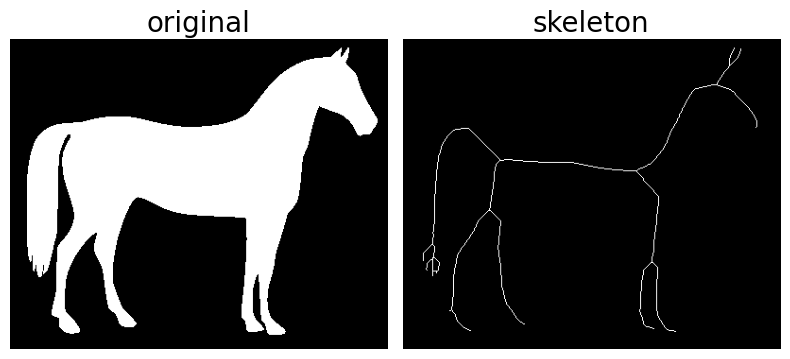

In [6]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

**Zhang's method vs Lee's method**

``skeletonize`` [Zha84]_ works by making successive passes of
the image, removing pixels on object borders. This continues until no
more pixels can be removed.  The image is correlated with a
mask that assigns each pixel a number in the range [0...255]
corresponding to each possible pattern of its 8 neighboring
pixels. A look up table is then used to assign the pixels a
value of 0, 1, 2 or 3, which are selectively removed during
the iterations.

``skeletonize(..., method='lee')`` [Lee94]_ uses an octree data structure
to examine a 3x3x3 neighborhood of a pixel. The algorithm proceeds by
iteratively sweeping over the image, and removing pixels at each iteration
until the image stops changing. Each iteration consists of two steps: first,
a list of candidates for removal is assembled; then pixels from this list
are rechecked sequentially, to better preserve connectivity of the image.

Note that Lee's method [Lee94]_ is designed to be used on 3-D images, and
is selected automatically for those. For illustrative purposes, we apply
this algorithm to a 2-D image.

.. [Zha84] A fast parallel algorithm for thinning digital patterns,
           T. Y. Zhang and C. Y. Suen, Communications of the ACM,
           March 1984, Volume 27, Number 3.

.. [Lee94] T.-C. Lee, R.L. Kashyap and C.-N. Chu, Building skeleton models
           via 3-D medial surface/axis thinning algorithms.
           Computer Vision, Graphics, and Image Processing, 56(6):462-478,
           1994.




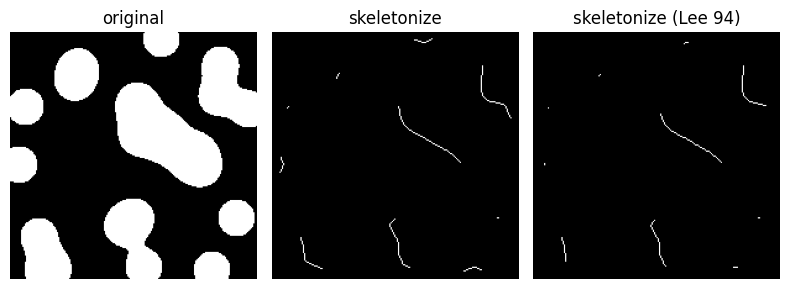

In [7]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, seed=1)

skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[2].set_title('skeletonize (Lee 94)')
ax[2].axis('off')

fig.tight_layout()
plt.show()

**Medial axis skeletonization**

The medial axis of an object is the set of all points having more than one
closest point on the object's boundary. It is often called the *topological
skeleton*, because it is a 1-pixel wide skeleton of the object, with the same
connectivity as the original object.

Here, we use the medial axis transform to compute the width of the foreground
objects. As the function ``medial_axis`` returns the distance transform in
addition to the medial axis (with the keyword argument ``return_distance=True``),
it is possible to compute the distance to the background for all points of
the medial axis with this function. This gives an estimate of the local width
of the objects.

For a skeleton with fewer branches, ``skeletonize`` should be preferred.



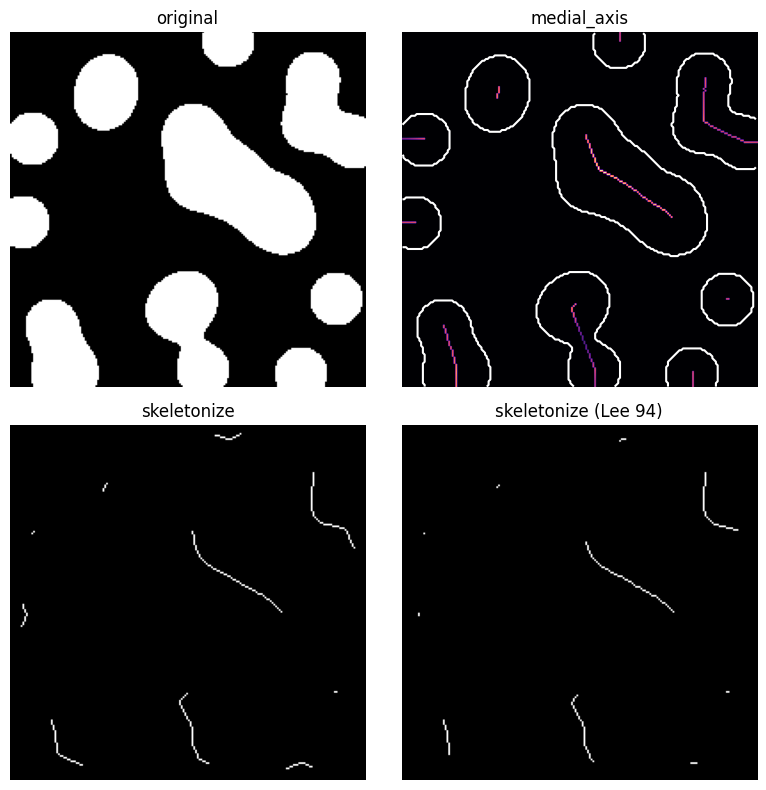

In [8]:
from skimage.morphology import medial_axis, skeletonize

# Generate the data
blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, seed=1)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

**Morphological thinning**

Morphological thinning, implemented in the `thin` function, works on the
same principle as `skeletonize`: remove pixels from the borders at each
iteration until none can be removed without altering the connectivity. The
different rules of removal can speed up skeletonization and result in
different final skeletons.

The `thin` function also takes an optional `max_num_iter` keyword argument to
limit the number of thinning iterations, and thus produce a relatively
thicker skeleton.



C:\Users\USER\AppData\Local\Temp\ipykernel_13684\1280505585.py:5: FutureWarning: `max_iter` is a deprecated argument name for `thin`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  thinned_partial = thin(image, max_iter=25)


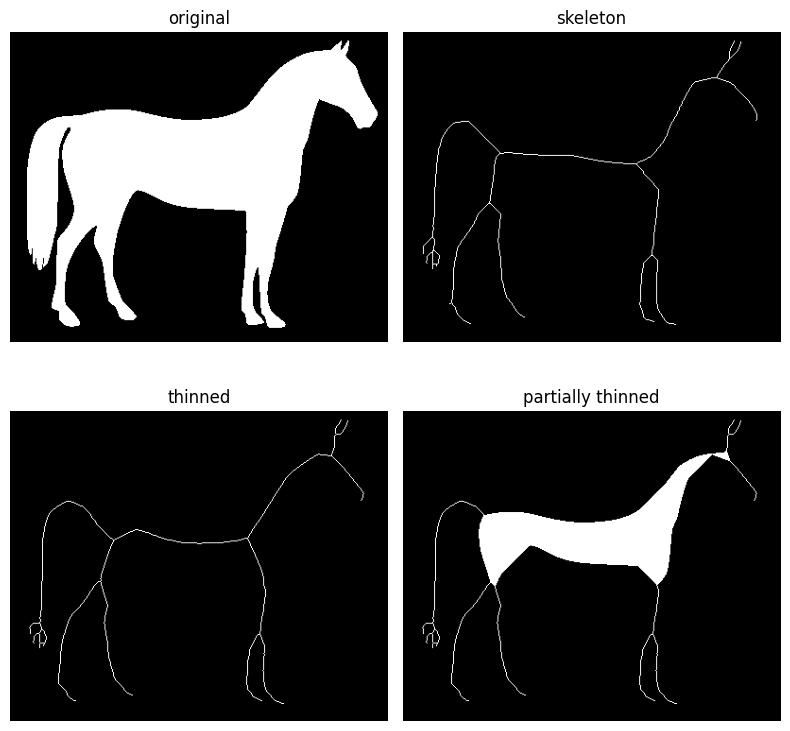

In [9]:
from skimage.morphology import skeletonize, thin

skeleton = skeletonize(image)
thinned = thin(image)
thinned_partial = thin(image, max_iter=25)

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton')
ax[1].axis('off')

ax[2].imshow(thinned, cmap=plt.cm.gray)
ax[2].set_title('thinned')
ax[2].axis('off')

ax[3].imshow(thinned_partial, cmap=plt.cm.gray)
ax[3].set_title('partially thinned')
ax[3].axis('off')

fig.tight_layout()
plt.show()

Change the code below, which uses CV to visualize the images, such that the visualization is done as above using matplotlib.

In [48]:
import cv2

image = cv2.imread(r"butterfly.png")

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Image', gray)
cv2.waitKey(0)
# if not already binary
#_, threshold = cv2.threshold(gray, 123, 255, cv2.THRESH_BINARY)

# calculate the distance transform, possible metrics...
# distTransform = cv2.distanceTransform(threshold, cv2.DIST_C, 3)
# distTransform = cv2.distanceTransform(threshold, cv2.DIST_L1, 3)
distTransform= cv2.distanceTransform(gray, cv2.DIST_L2, 3)
cv2.imwrite('distTransformed.png',distTransform)
dtimage = cv2.imread(r"distTransformed.png")
cv2.imshow('Transformed Distance Image', dtimage)
cv2.waitKey(0)

27

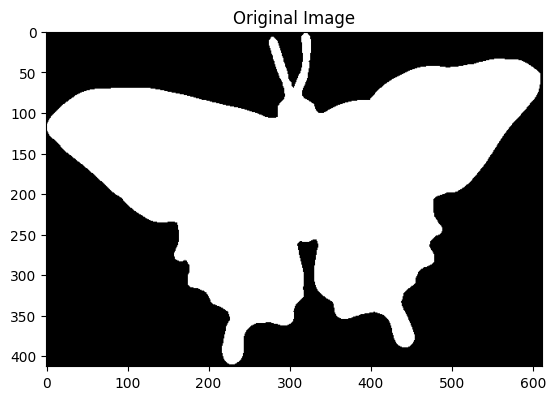

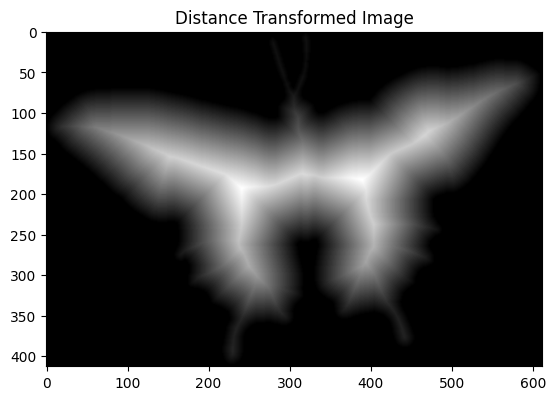

In [87]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"butterfly.png")

# display original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# calculate the distance transform
distTransform = cv2.distanceTransform(gray, cv2.DIST_L2, 3)

# display distance transformed image
plt.imshow(distTransform, cmap="gray")
plt.title("Distance Transformed Image")
plt.show()


### Reading and Showing Animals Data

A small dataset was collected from the internet for some animals with white background. it consists of 9 images, which are Chittah, Elephants, Giraffes and Rinhos, almost two different images for each except 3 images for elephants. 

In order to apply skeletonize to these images, they have to be binary, to do so two steps were follwoed, first converting the images to binary by global thresholding method (a number very close to white), then morphological operation was performed to clean the data and prevent overlapping between foreground and background.

The next phase was skeletonize the images using the normal, lee and zhang methods in addition to use more than one distance for representation.

In [1]:
from PIL import Image
import os

folder_path = "./data"
image_list = []

# Loop through all the files in the directory
for filename in os.listdir(folder_path):
    # Check if the file is a JPG image
    if filename.endswith(".jpg"):
        # Open the image and add it to the list
        img = Image.open(os.path.join(folder_path, filename))
        image_list.append(img)


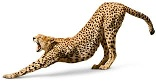

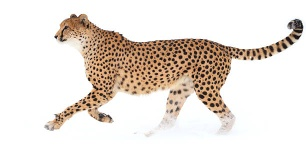

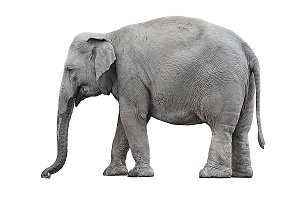

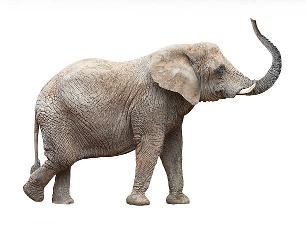

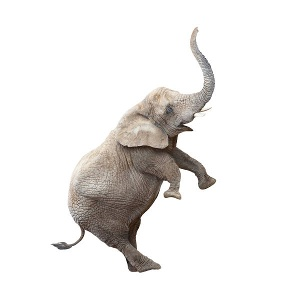

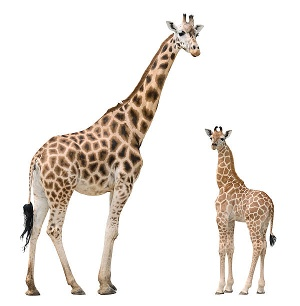

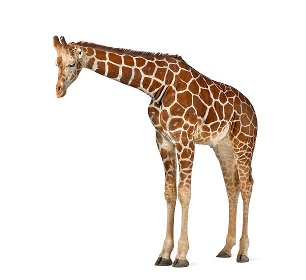

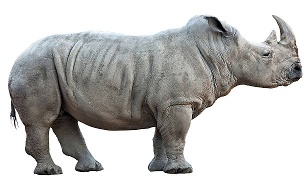

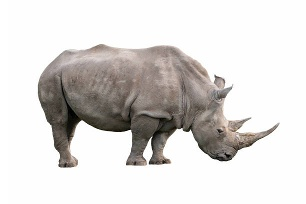

In [2]:
for img in image_list:
    display(img)

### Make images binary

In [3]:
first_image = image_list[0]
print(first_image.mode)


PIL Image mode: RGB


In [80]:
import cv2
import numpy as np

binary_image_list = []

for img in image_list:
    # Convert the PIL Image to an OpenCV image (numpy array) in grayscale
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

    # Define a threshold value close to white (255 is pure white, you can try values like 240 or 245)
    threshold_value = 240

    # Apply global thresholding with inversion
    _, binary_img_cv = cv2.threshold(img_cv, threshold_value, 255, cv2.THRESH_BINARY_INV)

    # Convert the OpenCV binary image (numpy array) back to PIL Image
    binary_img = Image.fromarray(binary_img_cv)
    binary_image_list.append(binary_img)


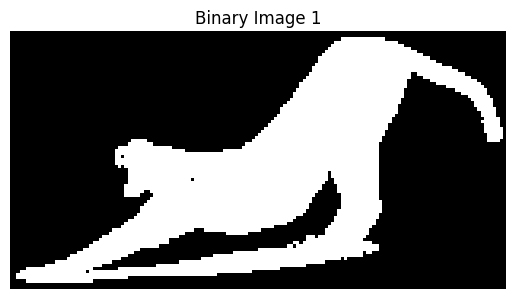

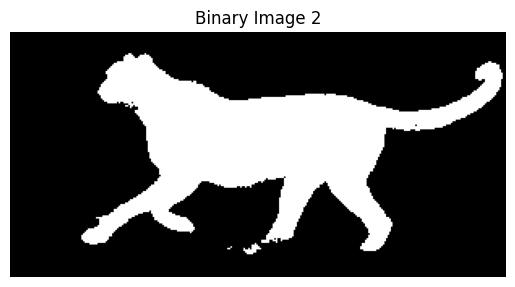

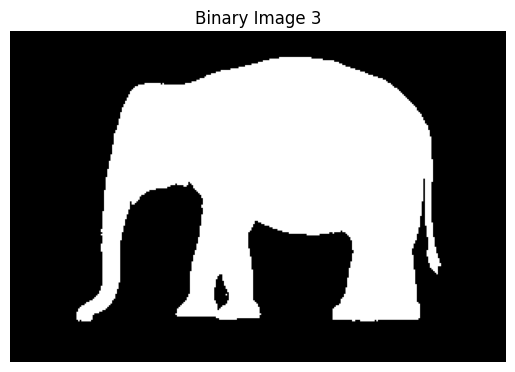

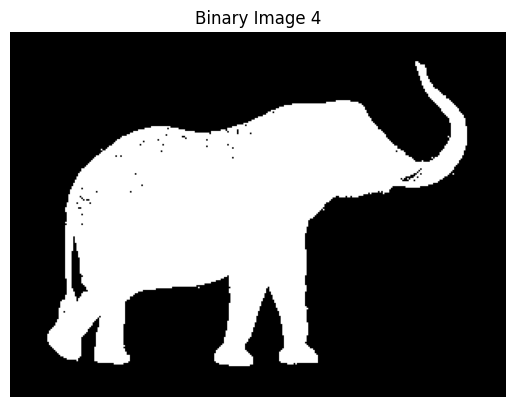

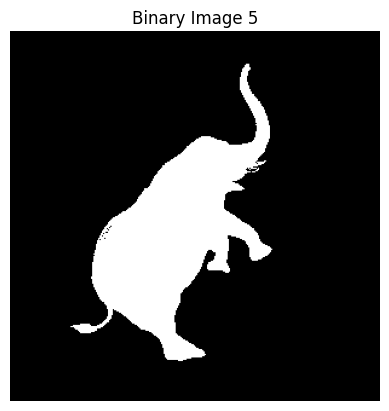

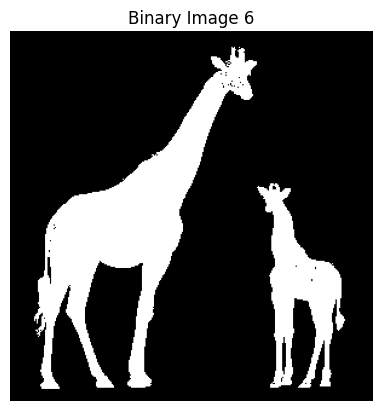

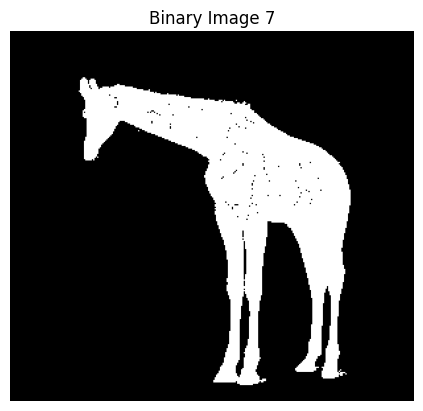

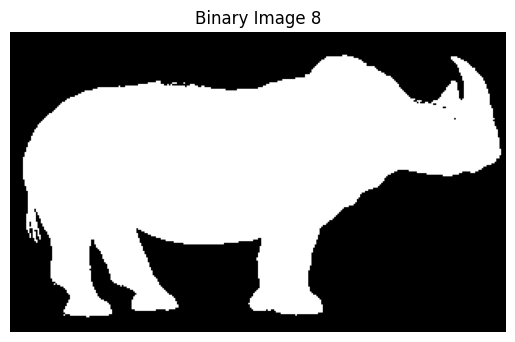

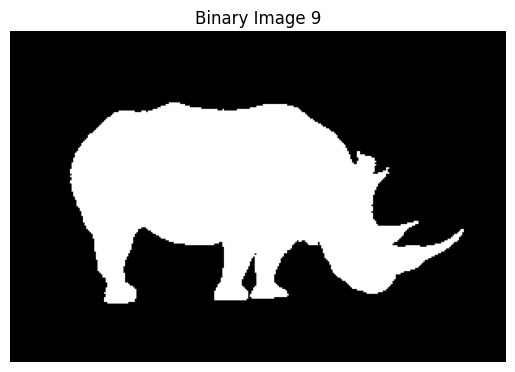

In [82]:
import matplotlib.pyplot as plt

# Display each binary image
for idx, binary_img in enumerate(binary_image_list):
    plt.figure()
    plt.imshow(binary_img, cmap='gray')
    plt.title(f'Binary Image {idx + 1}')
    plt.axis('off')

plt.show()


As it is shown, some black dots inside the body of some animals, therefore morphological closing will be performed

In [83]:
from skimage.morphology import closing
from skimage.morphology import square

# Define the kernel size for the closing operation
kernel_size = 5

# Create a square kernel with the defined size
kernel = square(kernel_size)

# Define the list to hold the cleaned binary images
cleaned_binary_image_list = []

# Loop through each binary image and perform morphological closing
for binary_img in binary_image_list:
    # Convert the Image to a Numpy array
    binary_img_np = np.array(binary_img)

    # Perform morphological closing with the defined kernel
    cleaned_binary_img_np = closing(binary_img_np, kernel)

    # Convert the cleaned binary image back to a PIL Image
    cleaned_binary_img = Image.fromarray(cleaned_binary_img_np)

    # Add the cleaned binary image to the list
    cleaned_binary_image_list.append(cleaned_binary_img)


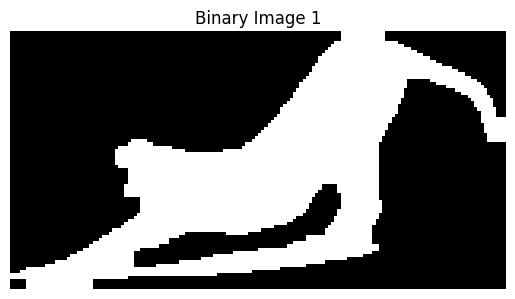

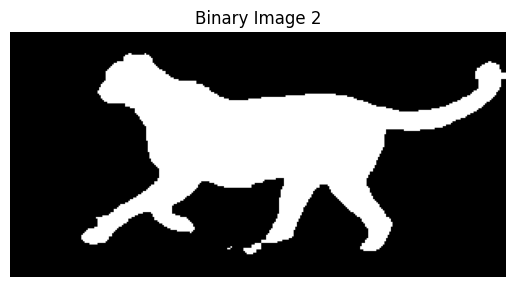

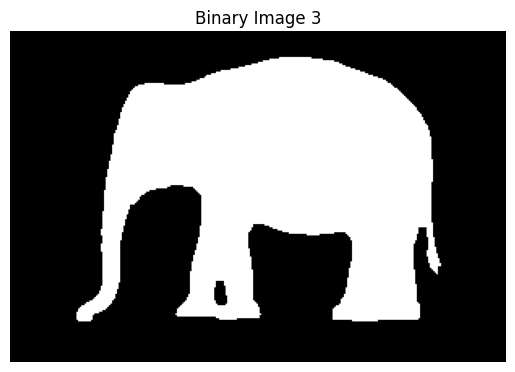

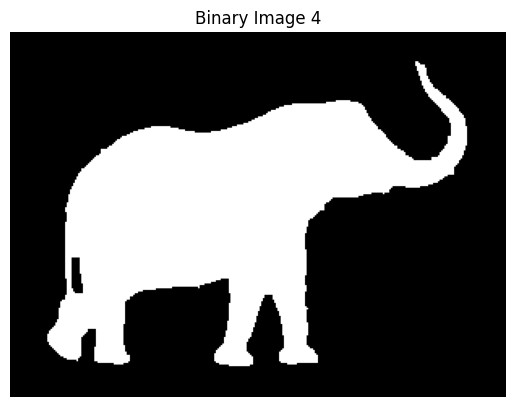

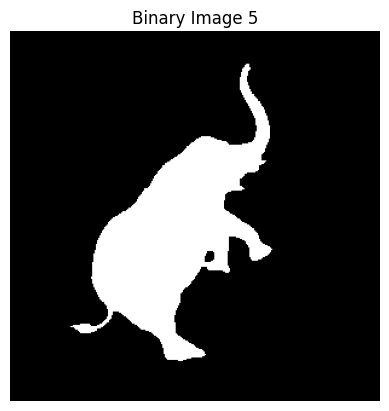

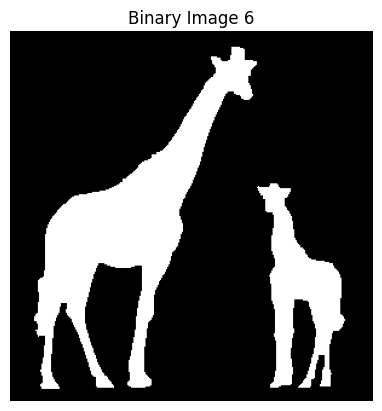

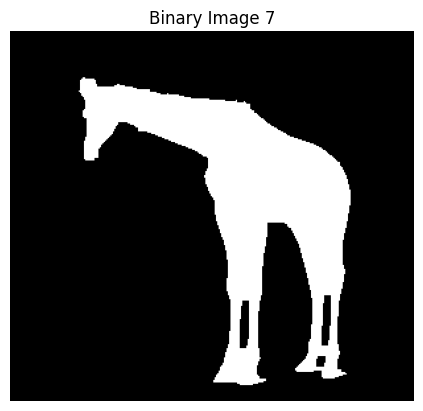

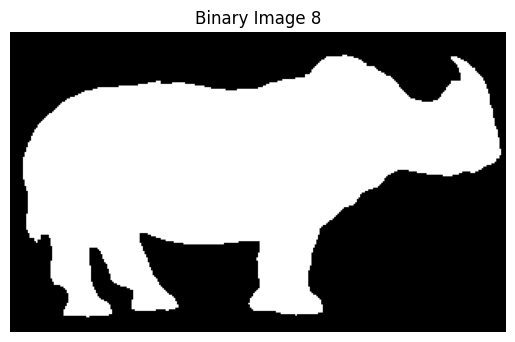

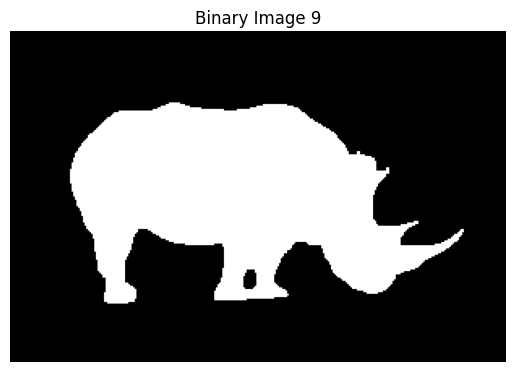

In [84]:
import matplotlib.pyplot as plt

# Display each binary image
for idx, binary_img in enumerate(cleaned_binary_image_list):
    plt.figure()
    plt.imshow(binary_img, cmap='gray')
    plt.title(f'Binary Image {idx + 1}')
    plt.axis('off')

plt.show()


Now we have cleaned binary images which can be used in the following section

### Skeletonize

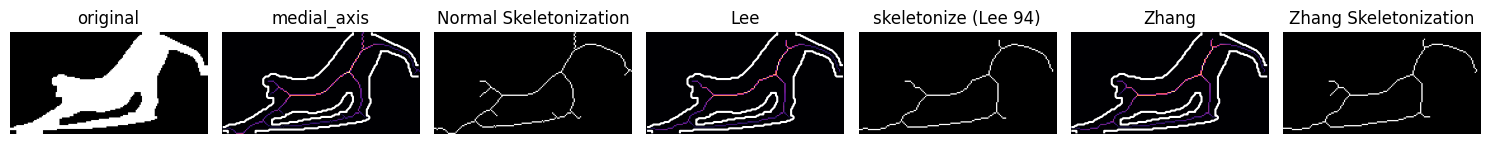

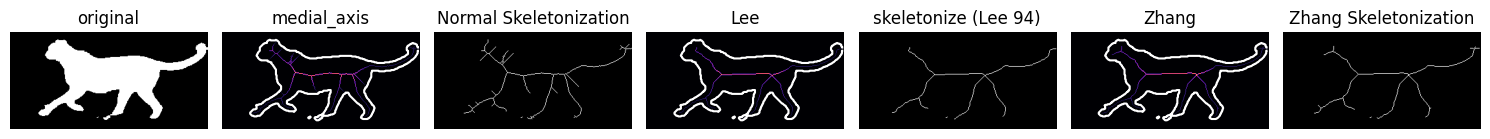

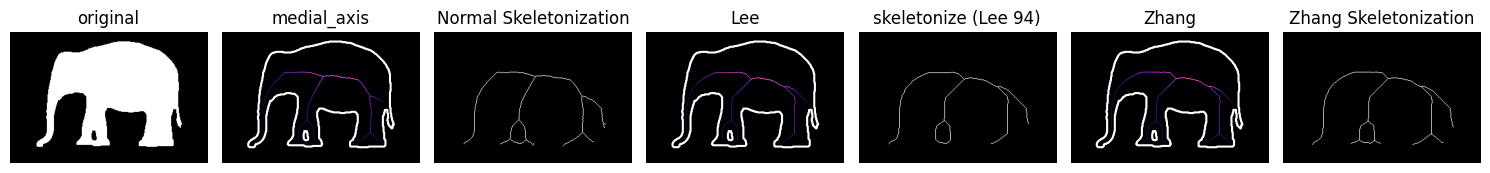

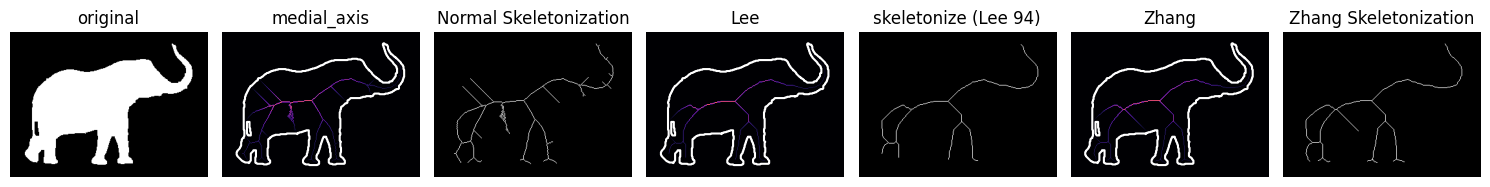

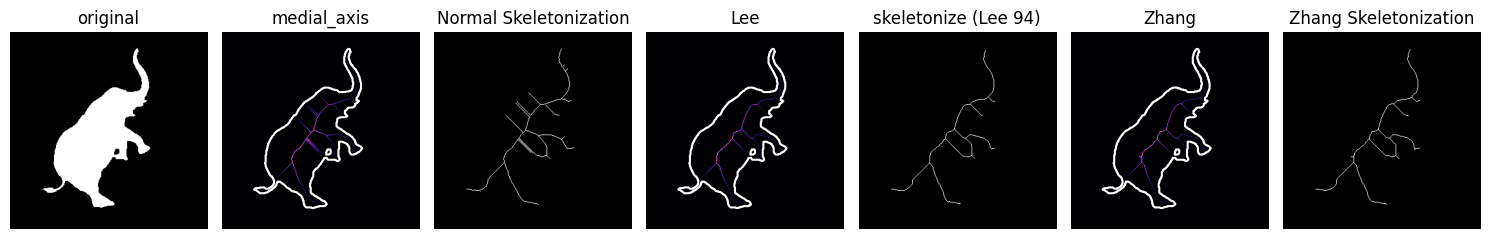

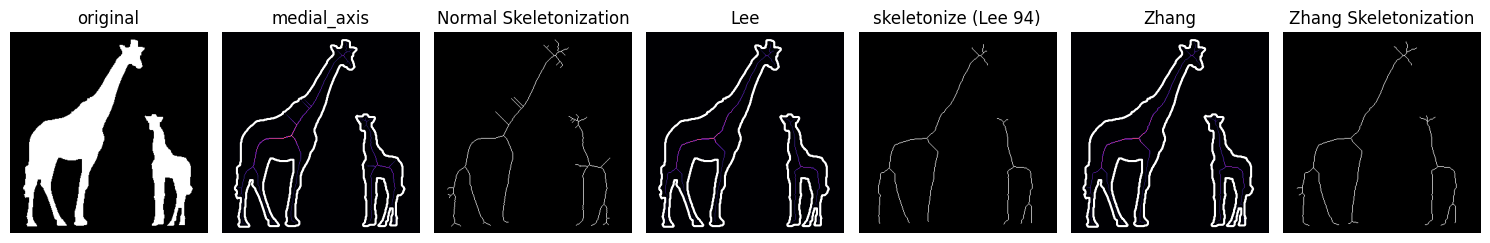

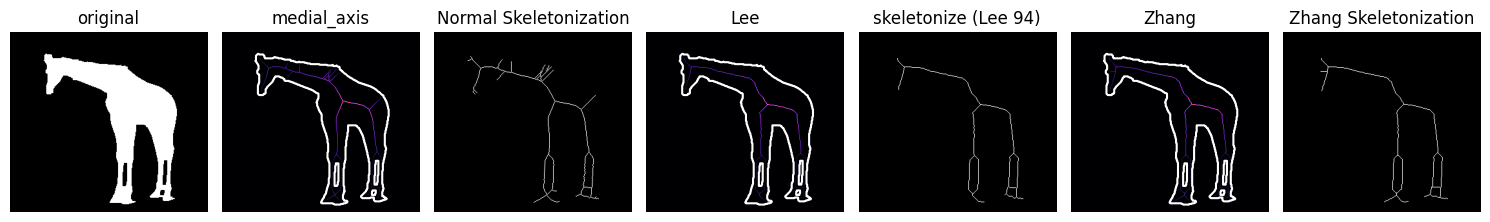

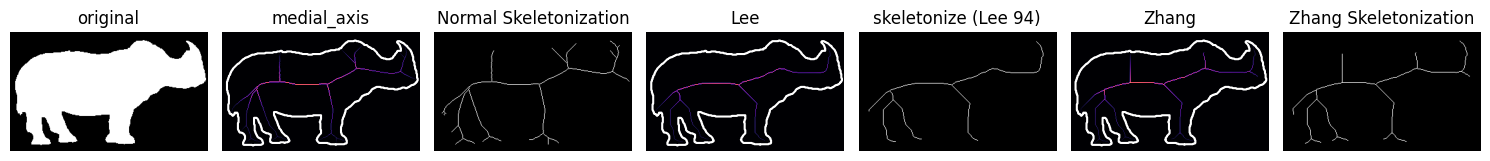

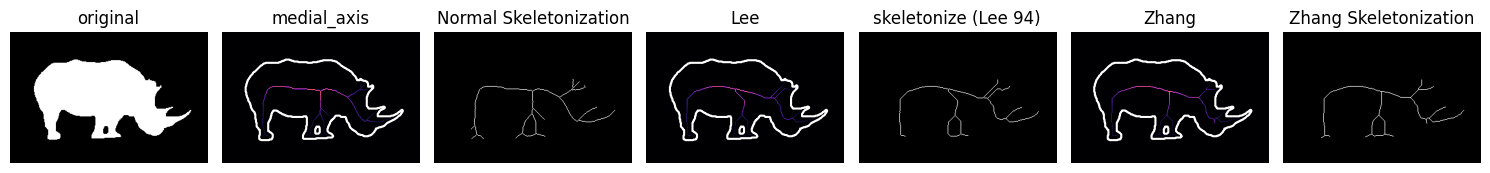

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, medial_axis
from skimage.util import invert

for index, cleaned_binary_img in enumerate(cleaned_binary_image_list):
    # Convert the PIL Image to an OpenCV image (numpy array)
    cleaned_binary_img_cv = np.array(cleaned_binary_img)

    # Normalize the image to the range [0, 1] and invert if needed
    normalized_img = cleaned_binary_img_cv / 255
    if np.mean(normalized_img) > 0.5:
        normalized_img = invert(normalized_img)

    # Apply the normal skeletonization algorithm (medial axis)
    skeleton_normal = medial_axis(normalized_img)

    # Apply the Lee skeletonization algorithm
    skeleton_lee = skeletonize(normalized_img, method='lee')

    # Apply the Zhang-Suen skeletonization algorithm
    skeleton_zhang = skeletonize(normalized_img, method='zhang')

    # Distance to the background for pixels of the skeleton
    distance = medial_axis(normalized_img, return_distance=True)[1]
    dist_on_skel = distance * skeleton_normal
    dis_on_lee = distance * skeleton_lee
    dis_on_zhang = distance * skeleton_zhang

    # Plot the results
    fig, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(cleaned_binary_img_cv, cmap=plt.cm.gray)
    ax[0].set_title('original')
    ax[0].axis('off')

    ax[1].imshow(dist_on_skel, cmap='magma')
    ax[1].contour(cleaned_binary_img_cv, [0.5], colors='w')
    ax[1].set_title('medial_axis')
    ax[1].axis('off')

    ax[2].imshow(skeleton_normal, cmap=plt.cm.gray)
    ax[2].set_title('Normal Skeletonization')
    ax[2].axis('off')
    

    ax[4].imshow(skeleton_lee, cmap=plt.cm.gray)
    ax[4].set_title('skeletonize (Lee 94)')
    ax[4].axis('off')

    ax[3].imshow(dis_on_lee, cmap='magma')
    ax[3].contour(cleaned_binary_img_cv, [0.5], colors='w')
    ax[3].set_title('Lee')
    ax[3].axis('off')

    ax[6].imshow(skeleton_zhang, cmap=plt.cm.gray)
    ax[6].set_title('Zhang Skeletonization')
    ax[6].axis('off')
    
    ax[5].imshow(dis_on_zhang, cmap='magma')
    ax[5].contour(cleaned_binary_img_cv, [0.5], colors='w')
    ax[5].set_title('Zhang')
    ax[5].axis('off')

    fig.tight_layout()
    plt.show()


Based on above images, The normal method detects the skeletion right but for most animals it detects other noisy parts of the skeleton. on the other hand, Lee method cathces the minimal and direct skeleton that connects the different parts of the animal. As for Zhang, it's in the middle between the two former methods.

I would choose Lee method, as the other methods in some cases make non-sense skeleton, and as mentioned before it chatches the main parts correctly, even though the method misses some details but i think it would be enough for simple movement applciations use for example
